In [1]:
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow import keras
from keras import backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))


# Any results you write to the current directory are saved as output.

In [2]:
# Read training and test data files
train = pd.read_csv("data/train_test/ALBP/train_ALBP.csv").values
test  = pd.read_csv("data/train_test/ALBP/test_ALBP.csv").values

In [3]:
print(len(train), len(test))

1200 200


In [4]:
# Reshape and normalize training data
trainX = train[:, :-1].reshape(train.shape[0],1,150, 100).astype( 'float32' )
X_train = trainX / 255.0

y_train = train[:, -1]


# Reshape and normalize test data
testX = test[:, :-1].reshape(test.shape[0],1, 150, 100).astype( 'float32' )
X_test = testX / 255.0

y_test = test[:, -1]


In [5]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)



In [31]:
# Build the model
# model = Sequential()
# # K.set_image_dim_ordering('th')
# # K.set_image_data_format('channels_first')
# model.add(Convolution2D(30, 5, 5, padding= 'valid' , input_shape=(1, 150, 100),activation= 'relu' ))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(15, 3, 3, activation= 'relu' ))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Flatten())
# # model.add(Dense(128, activation= 'relu' ))
# # model.add(Dense(50, activation= 'relu' ))
# # model.add(Dense(500, activation= 'relu' ))
# model.add(Dense(128, activation= 'relu' ))
# model.add(Dense(100, activation= 'softmax' ))

# ===========================================================
# Build the model
model = Sequential()
# K.set_image_dim_ordering('th')
K.set_image_data_format('channels_first')
model.add(Convolution2D(30, 5, 5, padding= 'valid' , input_shape=(1, 150, 100),activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(15, 3, 3, activation= 'relu' ))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))
model.add(Flatten())
# model.add(Dense(128, activation= 'relu' ))
# model.add(Dense(50, activation= 'relu' ))
# model.add(Dense(500, activation= 'relu' ))
# model.add(Dense(512, activation= 'relu' ))
# model.add(Dropout(0.3))
model.add(Dense(256, activation= 'relu' ))
model.add(Dense(128, activation= 'relu' ))
model.add(Dropout(0.5))
model.add(Dense(100, activation= 'softmax' ))

# Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [28]:
# Train the model
history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=100,
          batch_size= 32,
          callbacks=[keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)])

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.0074 - loss: 4.6108 - val_accuracy: 0.0000e+00 - val_loss: 4.7083
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.0135 - loss: 4.5671 - val_accuracy: 0.0000e+00 - val_loss: 5.4720
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.0171 - loss: 4.4805 - val_accuracy: 0.0000e+00 - val_loss: 5.6886
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.0156 - loss: 4.4676 - val_accuracy: 0.0000e+00 - val_loss: 5.8178
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.0102 - loss: 4.4655 - val_accuracy: 0.0000e+00 - val_loss: 6.3805
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.0128 - loss: 4.4420 - val_accuracy: 0.0000e+00 - val_loss: 6.4789
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.0084 - loss: 4.4303 - val_accuracy: 0.0000e+00 - val_loss: 6.5681
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.0189 - los

In [30]:
# Test the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('accuracy:', score)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0090 - loss: 4.5925  
accuracy: [4.607822895050049, 0.014999999664723873]


In [18]:
model.save("cnn_model_ALBP.keras")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 20)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 15, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     2,304,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,447,250 (28.41 MB)

 Trainable params: 2,482,416 (9.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,964,834 (18.94 MB)

### Visualization

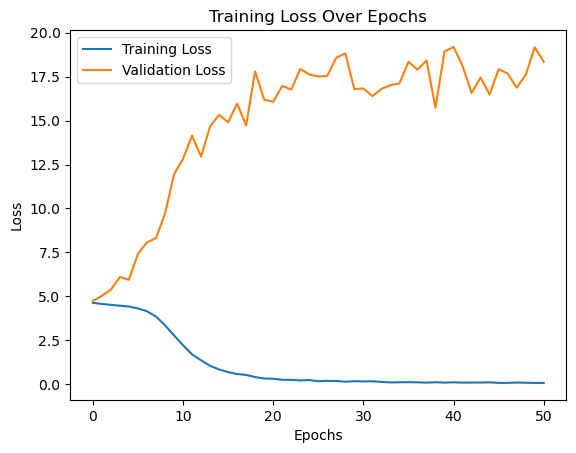

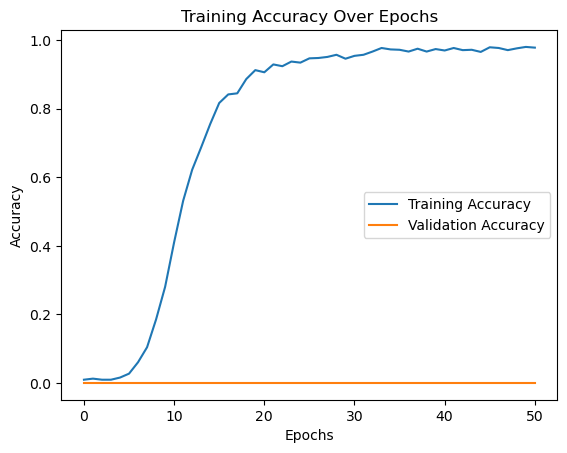

In [21]:
import matplotlib.pyplot as plt

# Plot the training loss over epochs
plt.plot(history.history['loss'], label='Training Loss')  # Training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss over epochs
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.title('Training Loss Over Epochs')  # Plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot

# Plot the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy over epochs
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Training Accuracy Over Epochs')  # Plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot
